In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('diamonds.csv')

In [4]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [18]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [9]:
df.shape

(53940, 10)

In [10]:
df.size

539400

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [17]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [25]:
dia_color= pd.crosstab(index= df['color'],columns='count')

In [26]:
dia_color

col_0,count
color,
D,6775
E,9797
F,9542
G,11292
H,8304
I,5422
J,2808


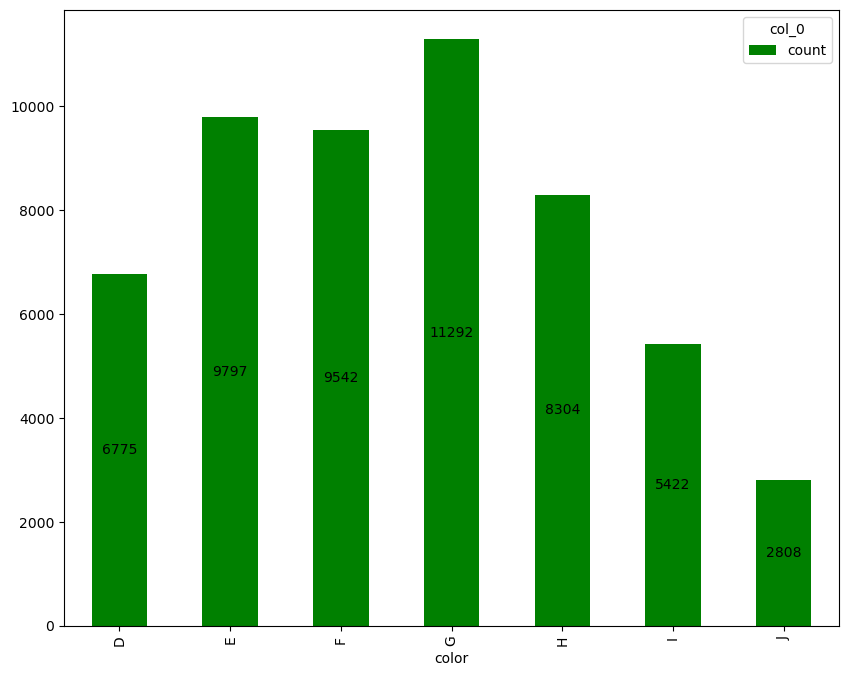

In [87]:
a=dia_color.plot(kind='bar',color='green',figsize=(10,8))
a.bar_label(a.containers[0],label_type='center');

In [42]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [39]:
dia_cut= pd.crosstab(index= df['color'],columns=df['cut'])

In [40]:
dia_cut

cut,Fair,Good,Ideal,Premium,Very Good
color,,,,,
D,163,662,2834,1603,1513
E,224,933,3903,2337,2400
F,312,909,3826,2331,2164
G,314,871,4884,2924,2299
H,303,702,3115,2360,1824
I,175,522,2093,1428,1204
J,119,307,896,808,678


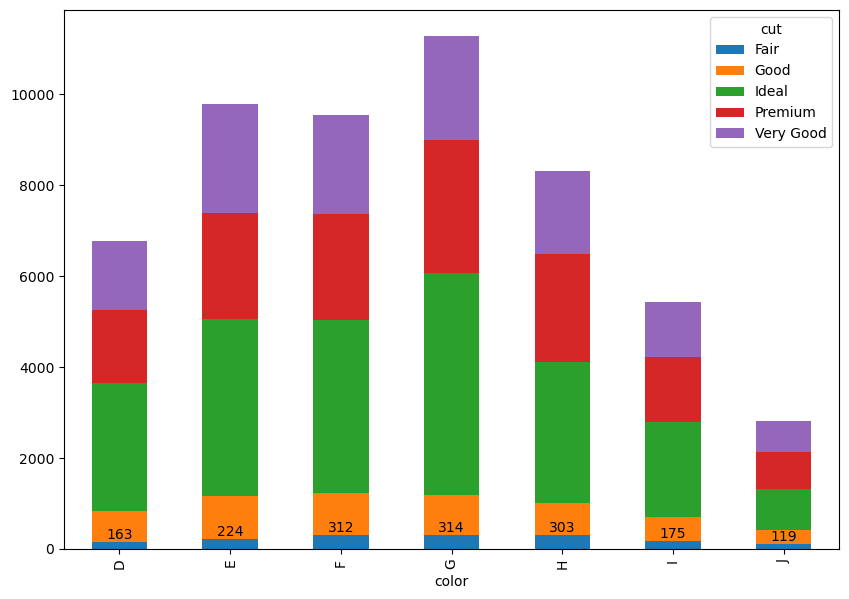

In [73]:
a=dia_cut.plot(kind='bar',stacked=True,figsize=(10,7))
a.bar_label(a.containers[0]);

In [74]:
print(a.containers[4][3])

Rectangle(xy=(2.75, 8993), width=0.5, height=2299, angle=0)


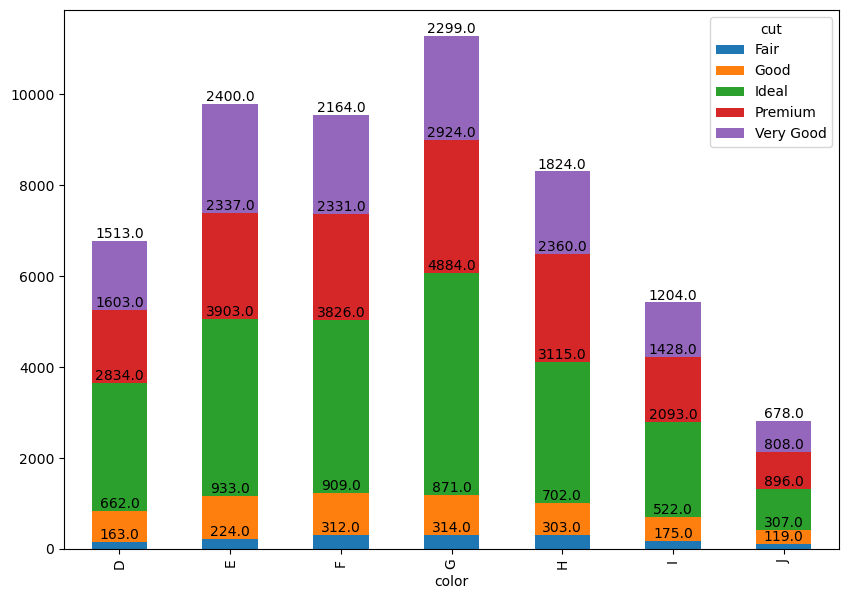

In [107]:
a=dia_cut.plot(kind='bar',stacked=True,figsize=(10,7))
for i in a.containers:
    for j in i:
        labels=[j.get_height() if j.get_height()>0 else '' for j in i]
    a.bar_label(i,labels=labels)

In [64]:
dia_cut

cut,Fair,Good,Ideal,Premium,Very Good
color,,,,,
D,163,662,2834,1603,1513
E,224,933,3903,2337,2400
F,312,909,3826,2331,2164
G,314,871,4884,2924,2299
H,303,702,3115,2360,1824
I,175,522,2093,1428,1204
J,119,307,896,808,678


<Axes: xlabel='carat', ylabel='price'>

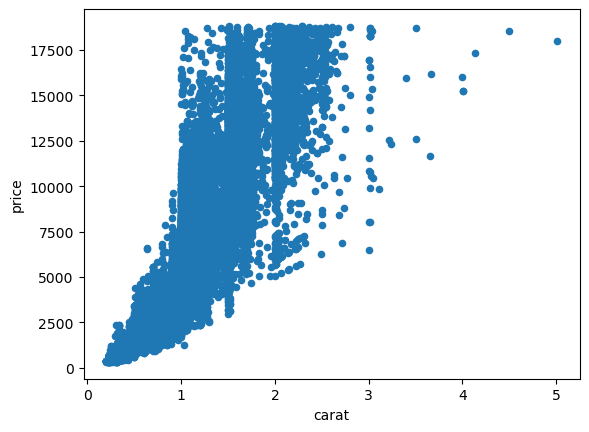

In [77]:
df.plot(kind='scatter',x='carat',y='price')

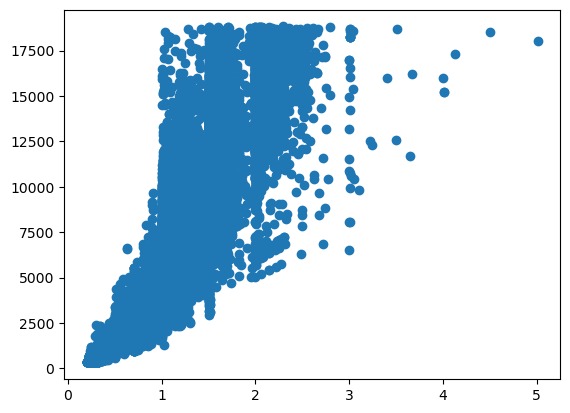

In [78]:
plt.scatter(df['carat'],df['price'])

<Axes: >

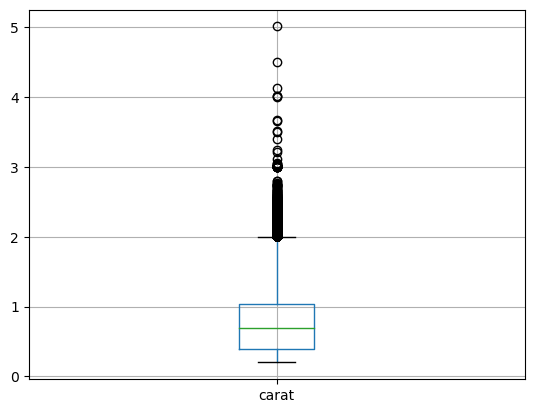

In [86]:
df.boxplot('carat')

<Axes: ylabel='carat'>

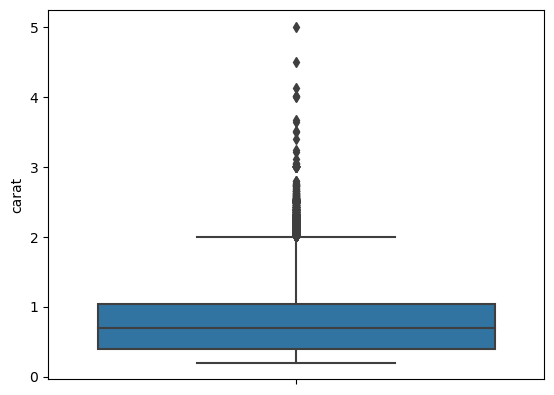

In [85]:
sns.boxplot(data=df,y='carat')

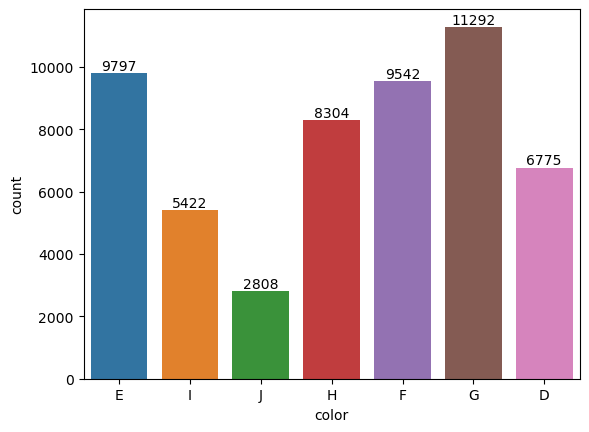

In [91]:
a=sns.countplot(data=df,x='color')
a.bar_label(a.containers[0]);

array([[<Axes: title={'center': 'carat'}>]], dtype=object)

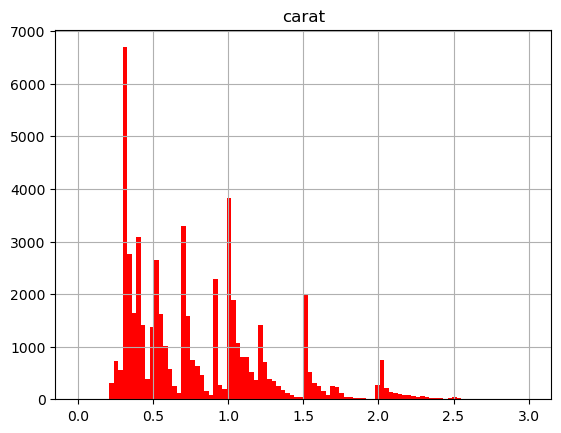

In [99]:
df.hist('carat',bins=100,color='red',range=(0,3))

C:\Users\excel\AppData\Local\Temp\ipykernel_19368\943581646.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carat'])


<Axes: xlabel='carat', ylabel='Density'>

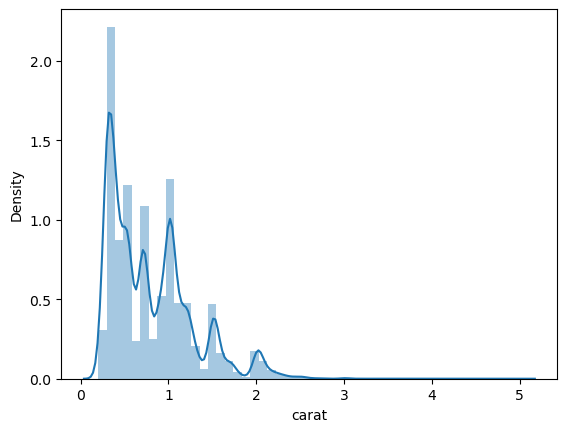

In [100]:
sns.distplot(df['carat'])

<Axes: xlabel='carat', ylabel='Density'>

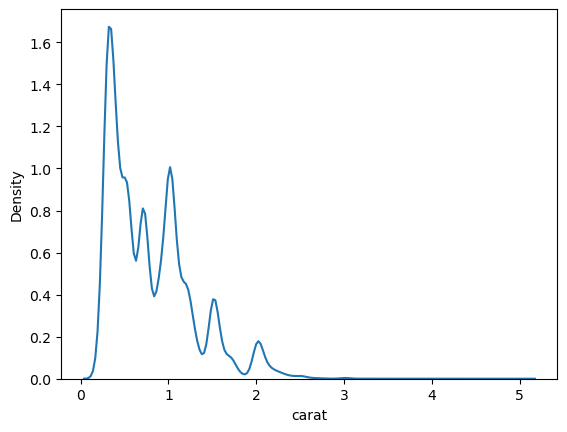

In [101]:
sns.kdeplot(data=df, x='carat')

In [102]:
df.cov()

C:\Users\excel\AppData\Local\Temp\ipykernel_19368\1545644723.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,carat,depth,table,price,x,y,z
carat,0.224687,0.019167,0.192365,1.742765e+03,0.518484,0.515248,0.318917
depth,0.019167,2.052404,-0.946840,-6.085371e+01,-0.040641,-0.048009,0.095968
table,0.192365,-0.946840,4.992948,1.133318e+03,0.489643,0.468972,0.237996
price,1742.765364,-60.853712,1133.318064,1.591563e+07,3958.021491,3943.270810,2424.712613
x,0.518484,-0.040641,0.489643,3.958021e+03,1.258347,1.248789,0.768487
y,0.515248,-0.048009,0.468972,3.943271e+03,1.248789,1.304472,0.767320
z,0.318917,0.095968,0.237996,2.424713e+03,0.768487,0.767320,0.498011


In [103]:
df.corr()

C:\Users\excel\AppData\Local\Temp\ipykernel_19368\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


C:\Users\excel\AppData\Local\Temp\ipykernel_19368\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

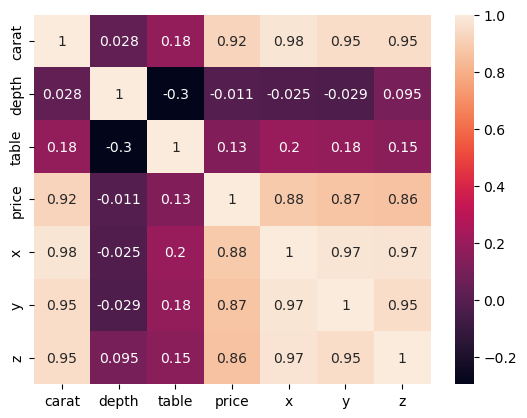

In [105]:
sns.heatmap(df.corr(),annot=True)

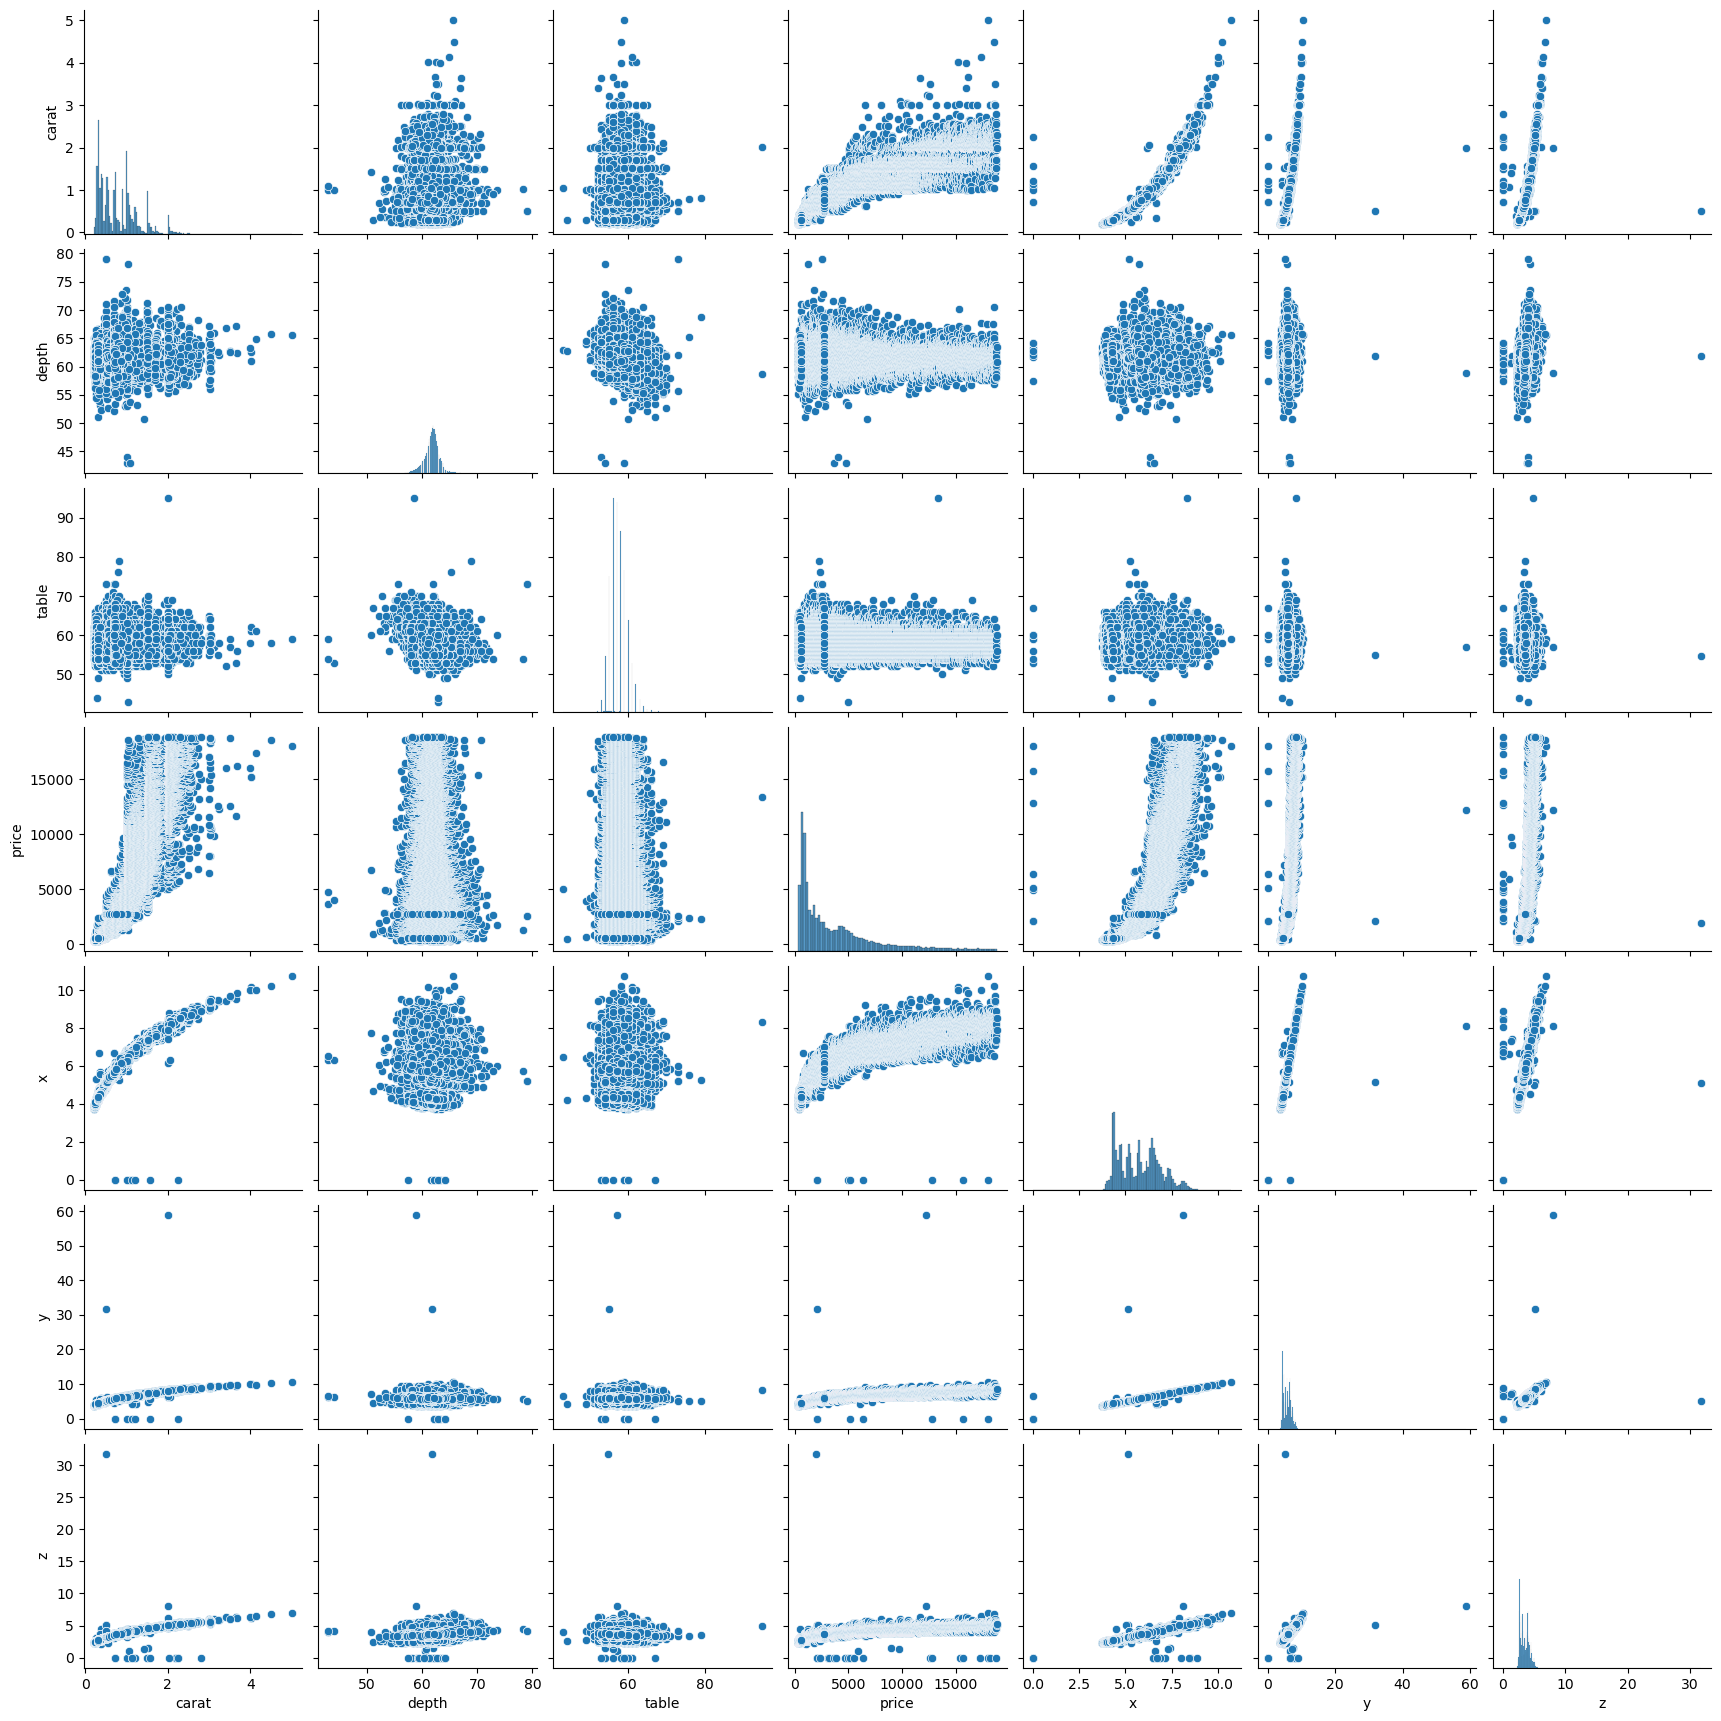

In [106]:
sns.pairplot(df)

<Axes: xlabel='carat', ylabel='price'>

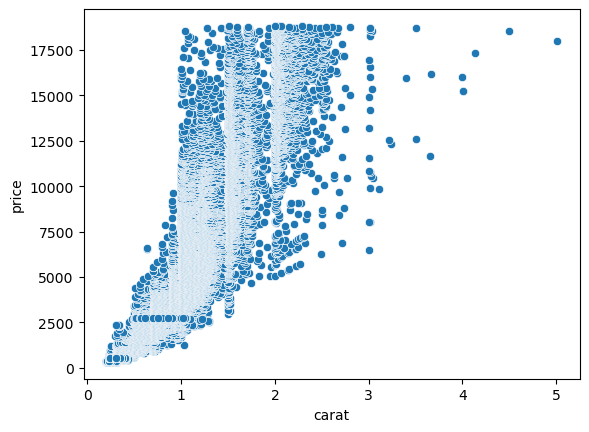

In [108]:
sns.scatterplot(data=df, x='carat',y='price')

In [110]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [112]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [113]:
df['carat'].mean()

0.7979397478680014

In [118]:
max=df['carat'].max()

In [119]:
df['carat'].std()

0.47401124440538067

In [120]:
min=df['carat'].min()

In [122]:
range= max-min
range

4.81

In [123]:
df['carat'].var()

0.22468665982273753

In [124]:
df['carat'].sum()

43040.869999999995

In [125]:
df['carat'].median()

0.7

In [128]:
Q1=df['carat'].quantile(0.25)
Q1

0.4

In [129]:
Q3=df['carat'].quantile(0.75)
Q3

1.04

In [130]:
IQR= Q3-Q1
IQR

0.64

In [131]:
df['carat'].value_counts()

0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
        ... 
3.02       1
3.65       1
3.50       1
3.22       1
3.11       1
Name: carat, Length: 273, dtype: int64